# Project 6: Named-Entity Recognition from Reddit Posts | Identifying Meme-Stocks
- Scrapped Reddit post data out of the Wallstreetbets subreddit
- Built a dataset out of the extracted information
- Performed Natural Language Processing preprocessing tasks
- Extracted company names from these posts in order to identify potential meme-stocks

In [1]:
#Reading the dataset created with the helper script
import pandas as pd
df = pd.read_csv('WallStreetBets.csv')
df.head()

,titles,posts,subreddit,creation_date,authors,upvotes,url
0,"Remarks of Richard B. Smith, Commissioner Unit...","""What I want to discuss with you today is a pi...",wallstreetbets,1.667245e+09,t2_2a5jbp59,1,https://www.reddit.com/r/wallstreetbets/commen...
1,Brazil,Brazil just finished their run-off election wi...,wallstreetbets,1.667244e+09,t2_6n2z4j2y,2,https://www.reddit.com/r/wallstreetbets/commen...
2,Gamelancer Media Corp. $GMNG $GAMGF has a new ...,Gamelancer Media Corp. has uploaded a new corp...,wallstreetbets,1.667243e+09,t2_a1jf7gbk,3,https://www.reddit.com/r/wallstreetbets/commen...
3,Trading SPY and FOMC Meeting,"Hey guys, this is another big week for the fut...",wallstreetbets,1.667243e+09,t2_5ylhcs6t,8,https://www.reddit.com/r/wallstreetbets/commen...
4,$LLY earnings call,"$LLY earnings, boomer play.\n\nMy 405c FDs for...",wallstreetbets,1.667243e+09,t2_gq4rwz6a,0,https://www.reddit.com/r/wallstreetbets/commen...


In [2]:
#Using NLTK to extract entities
import spacy
from spacy import displacy
import numpy as np
nlp = spacy.load('en_core_web_md')

In [3]:
#Define functions to extract entities that correspond to organizations
def get_orgs(cell):
    result=[]
    doc = nlp(cell)
    for entity in doc.ents:
        if entity.label_=='ORG':
            result.append(entity.text)
    if len(result)==0:
        return 'none'
    else:
        return list(set(result))

In [4]:
#Applying function defined in cell above
df['ORGS'] = df['posts'].apply(lambda x: get_orgs(x))

In [5]:
#Making sure everything looks nice
df.head()

,titles,posts,subreddit,creation_date,authors,upvotes,url,ORGS
0,"Remarks of Richard B. Smith, Commissioner Unit...","""What I want to discuss with you today is a pi...",wallstreetbets,1.667245e+09,t2_2a5jbp59,1,https://www.reddit.com/r/wallstreetbets/commen...,"[SEC, Fortran, Dijkstra, Banker, IBM, Harlan M..."
1,Brazil,Brazil just finished their run-off election wi...,wallstreetbets,1.667244e+09,t2_6n2z4j2y,2,https://www.reddit.com/r/wallstreetbets/commen...,none
2,Gamelancer Media Corp. $GMNG $GAMGF has a new ...,Gamelancer Media Corp. has uploaded a new corp...,wallstreetbets,1.667243e+09,t2_a1jf7gbk,3,https://www.reddit.com/r/wallstreetbets/commen...,[Gamelancer Media Corp.]
3,Trading SPY and FOMC Meeting,"Hey guys, this is another big week for the fut...",wallstreetbets,1.667243e+09,t2_5ylhcs6t,8,https://www.reddit.com/r/wallstreetbets/commen...,"[RSI, web2x&amp;context=3, FED, max, VIX, PCE,..."
4,$LLY earnings call,"$LLY earnings, boomer play.\n\nMy 405c FDs for...",wallstreetbets,1.667243e+09,t2_gq4rwz6a,0,https://www.reddit.com/r/wallstreetbets/commen...,"[LLY, Fed, Eli Lilly, Eli Lilly’s]"


In [6]:
#Counting hoy many instances per organization exist
all_together = []
for organizations in df[df['ORGS']!='none']['ORGS']:
    all_together = all_together + organizations
from collections import Counter
Counter(all_together).most_common(30)

[('Fed', 200),
 ('FOMC', 150),
 ('max', 100),
 ('Twitter', 100),
 ('FUBO', 100),
 ('VERANO', 100),
 ('CURALEAF', 100),
 ('SEC', 50),
 ('Fortran', 50),
 ('Dijkstra', 50),
 ('Banker', 50),
 ('IBM', 50),
 ('Harlan Mills', 50),
 ('Fortran](https://emmachev.com', 50),
 ('Markov', 50),
 ('NASDAQ', 50),
 ('IEEE Transactions on Software Engineering', 50),
 ('Mills', 50),
 ('Gamelancer Media Corp.', 50),
 ('RSI', 50),
 ('web2x&amp;context=3', 50),
 ('FED', 50),
 ('VIX', 50),
 ('PCE', 50),
 ('Bear Market Rally', 50),
 ('Apple', 50),
 ('https://preview.redd.it/simrw4hgs6x91.png?width=1621&amp;format=png&amp;auto=webp&amp;s=b99051cb337956bd26751615fd147f7829826e08',
  50),
 ('LLY', 50),
 ('Eli Lilly', 50),
 ('Eli Lilly’s', 50)]

In [24]:
#Visualizing the most commonly mentioned orgs in all data corpus
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
results = pd.DataFrame(Counter(all_together).most_common(50))
results.columns=['Organization','Counts']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Fed'),
  Text(1, 0, 'FOMC'),
  Text(2, 0, 'max'),
  Text(3, 0, 'Twitter'),
  Text(4, 0, 'FUBO'),
  Text(5, 0, 'VERANO'),
  Text(6, 0, 'CURALEAF'),
  Text(7, 0, 'SEC'),
  Text(8, 0, 'Fortran'),
  Text(9, 0, 'Dijkstra'),
  Text(10, 0, 'Banker'),
  Text(11, 0, 'IBM'),
  Text(12, 0, 'Harlan Mills'),
  Text(13, 0, 'Fortran](https://emmachev.com'),
  Text(14, 0, 'Markov'),
  Text(15, 0, 'NASDAQ'),
  Text(16, 0, 'IEEE Transactions on Software Engineering'),
  Text(17, 0, 'Mills'),
  Text(18, 0, 'Gamelancer Media Corp.'),
  Text(19, 0, 'RSI'),
  Text(20, 0, 'web2x&amp;context=3'),
  Text(21, 0, 'FED'),
  Text(22, 0, 'VIX'),
  Text(23, 0, 'PCE'),
  Text(24, 0, 'Bear Market Rally'),
  Text(25, 0, 'Apple'),
  Text(26, 0, 'https://preview.redd.it/simrw4hgs6x91.p

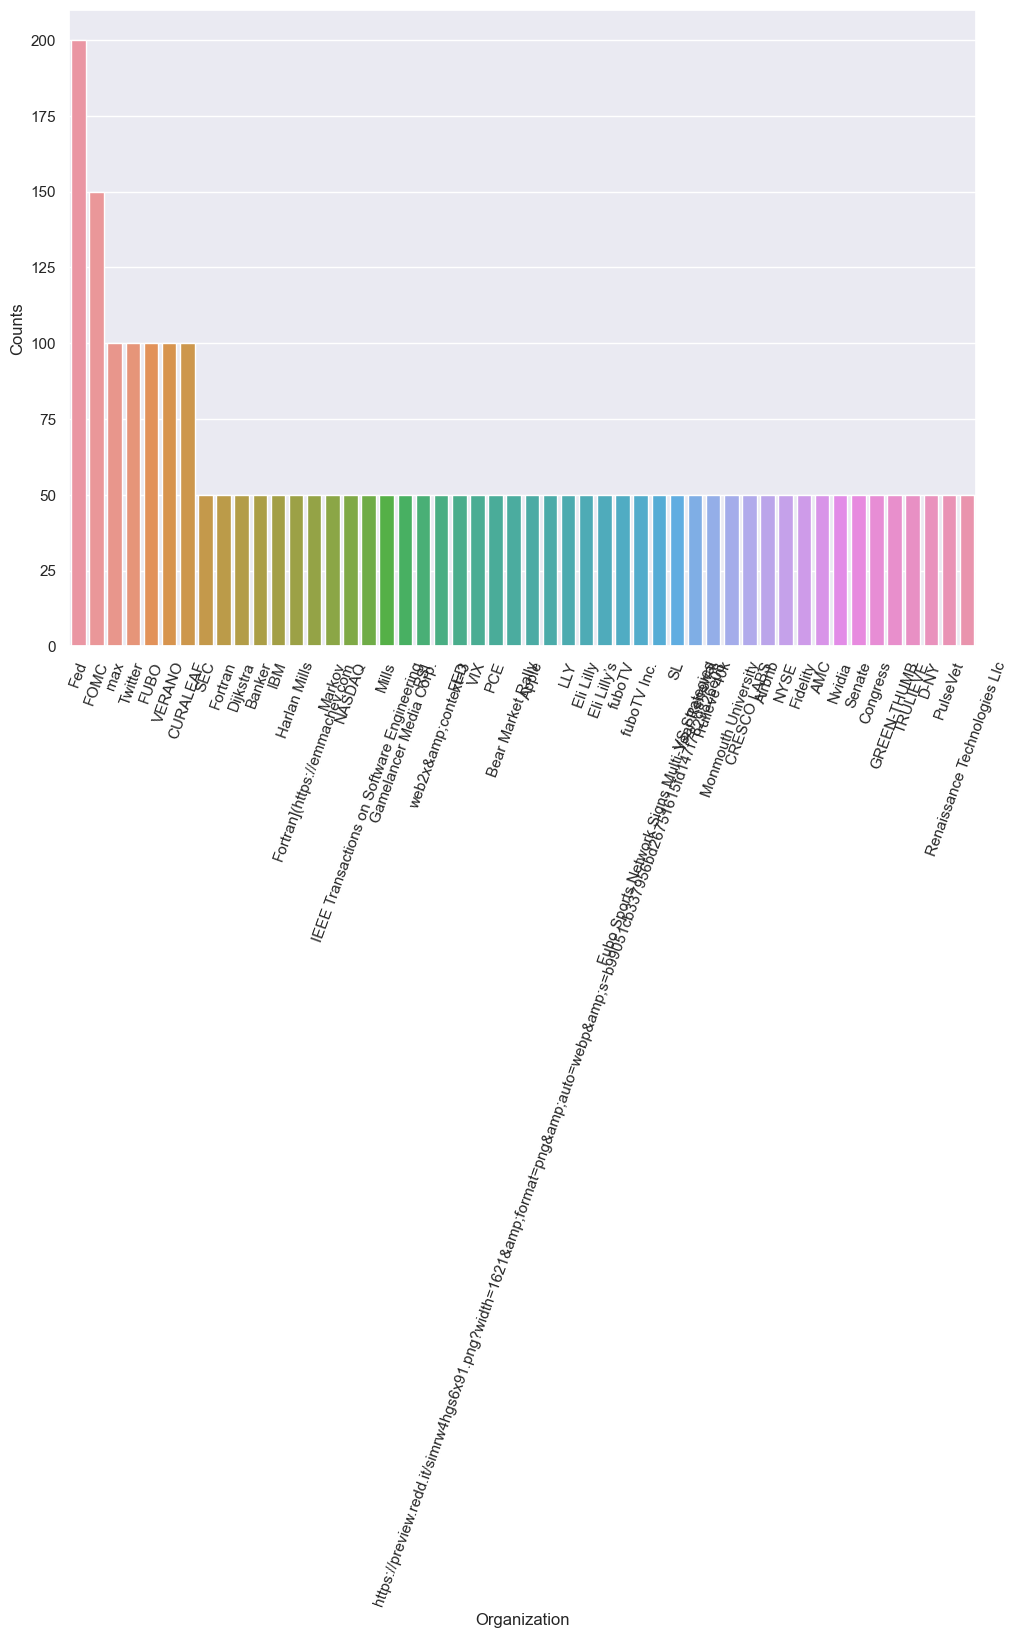

In [25]:
sns.barplot(x=results['Organization'], y=results['Counts'])
plt.xticks(rotation=70)